# Setting

In [1]:
from pf_utils import (BacktestManager, DataManager, FinancialRatios, 
                      StaticPortfolio, DynamicPortfolio, METRICS)
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
METRICS2 = [
    'total_return', 'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'
path_tran = 'transaction'

# Universe

In [3]:
WidgetUniverse

*Universe: equity pool and price file*

In [4]:
UV_K200 = ['kospi200', 'kospi200_prices']
UV_KRX  = ['krx',      'krx_prices']
UV_LIQ  = ['krx',      'krx_liq_prices']
UV_ETF  = ['etf',      'etfs_all']
UV_IRP  = ['fund',     'funds_irp']
UV_HANA = ['fund',     'funds_kebhana']

*Portfolio: universe and transaction file*

In [87]:
MOM = [*UV_K200, 'pf_k200_momentum']
PER = [*UV_K200, 'pf_k200_per']
ETF = [*UV_ETF,  'pf_etf_static']
LIQ = [*UV_LIQ,  'pf_liq_static']
IRP = [*UV_IRP,  'pf_tdf_static']
HANA= [*UV_HANA, 'pf_hana_static']
KRX = [*UV_KRX,  'test_pf_krx_momentum']

## KOSPI200

In [9]:
k200 = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], UV_K200))
)
k200.upload()

201 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated


In [10]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=k200.df_prices.columns
)
k200.download(**kw) if WidgetUniverse.values(0) else None

In [11]:
df_k200 = k200.df_prices
assetnames_k200 = k200.get_names()

## KRX

In [79]:
krx = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], UV_KRX))
)
krx.upload()

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices updated


In [80]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

In [81]:
df_krx = krx.df_prices
assetnames_krx = krx.get_names()

ERROR from get_names: '164060'


### KOSPI

In [82]:
from pf_utils import KRXDownloader
market = 'KOSPI'
krxd = KRXDownloader(None)
krxd.get_tickers(market)
assets_kospi = krxd.tickers

In [83]:
df_kospi = df_krx[df_krx.columns.intersection(assets_kospi)]

## ETF

In [12]:
etf = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], UV_ETF)))
etf.upload()

911 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated


In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=etf.df_prices.columns
)
etf.download(**kw) if WidgetUniverse.values(0) else None

In [14]:
selected = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etf = etf.df_prices[selected]
assetnames_etf = etf.get_names(tickers=selected)
assetnames_etf

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

## IRP - FUNDS
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8370&fundcode=8380
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537400&childFundGb=2&childFundCd=53740P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537410&childFundGb=2&childFundCd=53741P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [15]:
irp = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], UV_IRP))
)
irp.upload()
df = irp.check_days_in_year(252)

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices updated


In [16]:
irp.convert_to_daily(True)

REMINDER: 9 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [17]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()

import pandas as pd
df_an = pd.Series(assetnames_irp).to_frame('name')

In [18]:
irp.get_date_range().sort_values('end date').join(df_an)

,start date,end date,name
K55105BS5067,2017-07-31,2024-08-26,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe
K55223BT1450,2017-07-31,2024-08-26,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55301BU5479,2017-08-14,2024-08-26,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
K55207BU0715,2017-08-31,2024-08-26,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe
K55210BU2435,2017-08-31,2024-08-26,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
K55365BT3694,2017-08-31,2024-08-26,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
KR5223AE3357,2017-08-31,2024-08-26,kb퇴직연금배당증권자투자신탁(주식)C-E
K55301BU6139,2017-09-20,2024-08-26,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
K55301BU5453,2017-09-29,2024-08-26,미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
K55203C53681,2018-04-30,2024-08-26,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe


In [19]:
irp.performance('sharpe', 'year').join(df_an)

,daily_sharpe,monthly_sharpe,yearly_sharpe,name
K55301BU6139,0.779196,0.905514,0.600542,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
K55301BU5479,0.761174,0.897551,0.600273,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
K55365BT3694,0.523945,0.635648,0.573647,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2
K55213C51890,0.613093,0.748384,0.542374,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금)
K55223BT1450,0.524394,0.636211,0.484719,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e
K55210BU2435,0.562201,0.683774,0.478562,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re)
K55203C53681,0.443305,0.535309,0.475771,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe
K55206C96311,0.585596,0.617055,0.447164,키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55206C95800,0.628952,0.641508,0.436946,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
K55207BU0715,0.383179,0.461339,0.417496,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe


## HANA - FUNDS
- https://dis.kofia.or.kr

In [20]:
hana = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], UV_HANA))
)
hana.upload()
hana.get_date_range()

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-07-31
KR5370AP9956,2014-04-30,2024-07-31
KR5236AS4826,2014-05-30,2024-07-31
K55306CV9946,2019-10-31,2024-07-31


In [21]:
hana.check_days_in_year(12)

KR5101888398    12.0
KR5236AS4826    12.0
KR5370AP9956    12.0
K55306CV9946    12.0
dtype: float64

In [22]:
hana.convert_to_daily(True)

KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: 4 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [23]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
assetnames_hana

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

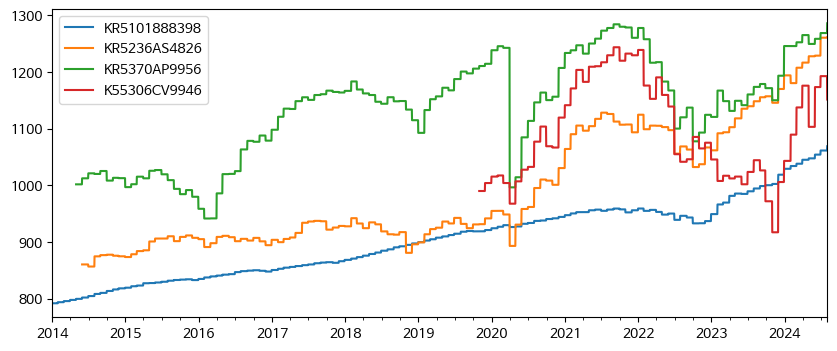

In [24]:
_ = df_hana.loc['2014':].plot(figsize=(10,4))

## LIQ

In [25]:
# portfolio of past trading system to liquidate soon
tickers_liq = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [26]:
liq = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], UV_LIQ))
)
liq.upload()

24 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated


In [27]:
kw = dict(
    n_years=3, 
    tickers=tickers_liq,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

In [28]:
df_liq = liq.df_prices
assetnames_liq = liq.get_names()

## Additional Data

### Financial Ratio

In [29]:
WidgetUniverse

In [30]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-04 loaded


In [31]:
start = '2023-01-01'
tickers = df_k200.columns.to_list()
kw = dict(
    freq = 'd',
    close_today = WidgetUniverse.values(1)
)
fr.download(tickers, start, **kw) if WidgetUniverse.values(0) else None

In [32]:
df_p = fr.util_reshape(df_k200)

fratios_dict = dict()
for r in ['PER', 'PBR']:
    df = fr.interpolate(df_p, r)
    fratios_dict[r] = fr.util_reshape(df, stack=False)

# Transaction

## MOM

In [121]:
kwargs = dict(
    name='KOSPI Momentum',
    file=MOM[-1],
    method_select='Simple', method_weigh='ERC', lookback='1y', lag='1w',
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)
kwargs.update(DynamicPortfolio.check_init_args('momenutm'))

pf_k200 = DynamicPortfolio(df_k200, **kwargs)

16 assets removed for shorter periods (8.0%)
185 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-08 loaded


In [122]:
pf_k200.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                          
2024-09-27 267260      HD현대일렉트릭  319500            0    8     NaN   0.1835
           003230          삼양식품  538000            0    6     NaN   0.2317
           079550        LIG넥스원  210500            0   14     NaN   0.2116
           042700         한미반도체  113000            0   21     NaN   0.1704
           012450     한화에어로스페이스  282588            9    9     NaN   0.1826
           489790  한화인더스트리얼솔루션즈   31301            9    9     NaN   0.0202
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000

In [123]:
# run after editting record file
#_ = pf_k200.update_record(save=True)

Portfolio value 15,088,500, Profit -4.5% on 2024-11-04
Assets 489790 added to universe


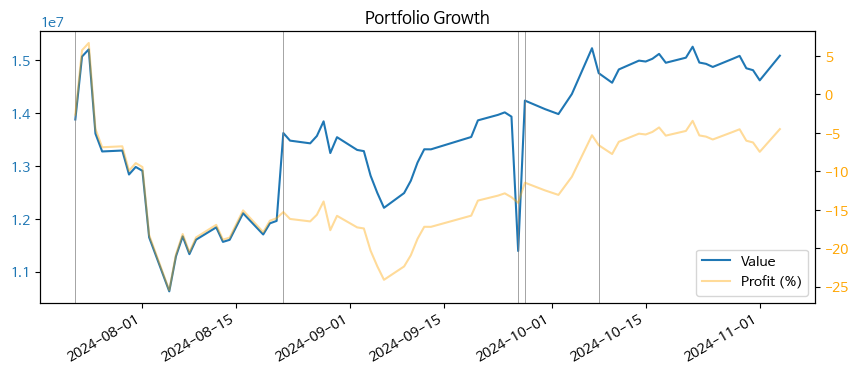

In [124]:
pf_k200.valuate()

In [125]:
pf_k200.performance(metrics=METRICS)

,KOSPI Momentum
start,2024-07-22
end,2024-11-04
total_return,0.087029
cagr,0.336801
calmar,1.118099
max_drawdown,-0.301226
avg_drawdown,-0.128628
avg_drawdown_days,33.333333
daily_vol,0.823459
daily_sharpe,0.772335


In [126]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [129]:
kwargs_trs = dict(
    n_assets = 5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_k200.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_k200.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-10-23 to 2024-10-21
Weights of assets determined by ERC.
Mean absolute error of weights: 7 %
Assets 489790 added to universe
Portfolio value 13,957,900, Profit -5.7% on 2024-11-04
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                        
2024-10-08 267260      HD현대일렉트릭  321000            0    8  0.182  0.1742
           012450     한화에어로스페이스  364500            0    9   0.21  0.2225
           079550        LIG넥스원  243500           -3   11  0.192  0.1817
           003230          삼양식품  524000            0    6  0.216  0.2133
           011790           SKC  153600           20   20    0.2  0.2084
           042700         한미반도체  108100          -21    0    NaN     0.0
           489790  한화인더스트리얼솔루션즈   39350           -9    0    NaN     0.0
2024-10-21 267260      HD현대일렉트릭  319000            0    8  0.183  0.1816
           012450     한화에어로스페이스  381500           -1    8  0.216  0.2171
           003230          삼양식품  551000           -1    5  0.208  0.1960
           079550        LIG넥스원  254500            0   11  0.192  0.1992
           000150            두산  207000           14   14  0.202  0.2062
           011790           SKC  148000          -20    0    NaN       0

### Copy record to edit

In [11]:
date = '2024-09-27'
save = False

pf_k200.copy_record(date, save=save)

Transaction record to 2024-09-27 loaded
ERROR: check the date as no new transaction


### Update record

In [18]:
pf_k200.update_record()

Transaction record to 2024-09-27 loaded
Actual weights updated
Transaction file pf_k200_momentum_240927.csv updated
self.record updated


name   price  transaction  net  weight weight*
date       asset                                                         
2024-07-22 003230          삼양식품  637000            5    5   0.227  0.2234
           267260      HD현대일렉트릭  314000            9    9   0.198  0.1982
           042700         한미반도체  149000           20   20   0.205  0.2090
           000150            두산  200000           13   13   0.189  0.1824
           010120   LS ELECTRIC  222000           12   12   0.181  0.1869
2024-08-22 267260      HD현대일렉트릭  318000           -1    8   0.192  0.1856
           003230          삼양식품  509000            1    6   0.217  0.2228
           012450     한화에어로스페이스  282500           10   10   0.206  0.2061
           079550        LIG넥스원  193000           14   14   0.199  0.1971
           042700         한미반도체  123100            1   21   0.186  0.1886
           000150            두산  147600          -13    0   0.000  0.0000
           010120   LS ELECTRIC  174400          -12    0   0.000  0.0000
2024-09-26 267260      HD현대일렉트릭  335000            0    8     NaN  0.2353
           003230          삼양식품  548000            0    6     NaN  0.2887
           012450     한화에어로스페이스  282500          -10    0     NaN  0.0000
           079550        LIG넥스원  216000            0   14     NaN  0.2655
           042700         한미반도체  114200            0   21     NaN  0.2105
2024-09-27 267260      HD현대일렉트릭  319500            0    8     NaN  0.1835
           003230          삼양식품  538000            0    6     NaN  0.2317
           079550        LIG넥스원  210500            0   14     NaN  0.2116
           042700         한미반도체  113000            0   21     NaN  0.1704
           012450     한화에어로스페이스  282588            9    9     NaN  0.1826
           489790  한화인더스트리얼솔루션즈   31301            9    9     NaN  0.0202

## KRX: Simulation

In [88]:
kwargs = dict(
    name='KRX Momentum',
    file=KRX[-1],
    method_select='Simple', method_weigh='Equally', lookback='1y', lag='1m',
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_krx,
)

pf_krx = DynamicPortfolio(df_krx, **kwargs)

616 assets removed for shorter periods (22.7%)
2096 assets from 2019-01-02 to 2024-10-08 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-02 loaded


In [89]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

Portfolio value 6,815,572, Profit -37.2% on 2024-10-08


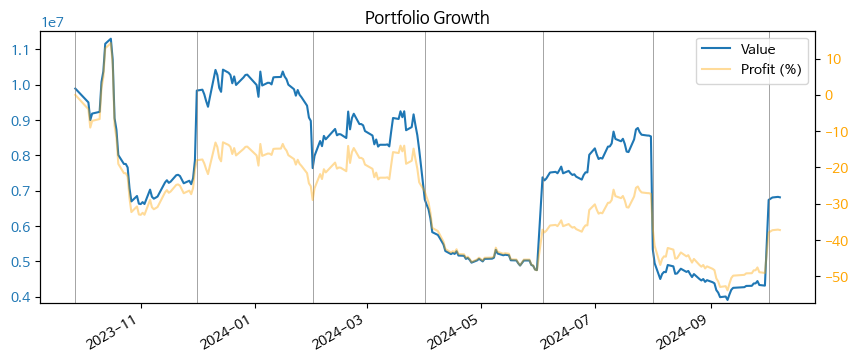

In [90]:
pf_krx.valuate()

In [91]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [92]:
kwargs_trs = dict(
    n_assets = 5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-09-08 to 2024-09-06
ERROR: check the date as no new transaction
Portfolio value 3,989,360, Profit -52.9% on 2024-09-06


name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

## PER

In [93]:
df_ratio = fratios_dict['PER']

In [94]:
kwargs = dict(
    name='PER',
    file=PER[-1],
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
    lookback='2m', #'1w',
    df_additional=df_ratio,
    method_weigh='equally',
)
kwargs.update(DynamicPortfolio.check_init_args('per'))

pf_per = DynamicPortfolio(df_k200, **kwargs)

201 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-17 loaded


In [95]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-10-17 010060   OCI홀딩스   66700           14   14     0.2   0.1892
           003030   세아제강지주  164450            6    6     0.2   0.1999
           009970  영원무역홀딩스   89000           11   11     0.2   0.1983
           016380     KG스틸    6600          154  154     0.2   0.2059
           047040     대우건설    3820          267  267     0.2   0.2066

Portfolio value 4,991,860, Profit 1.1% on 2024-11-04


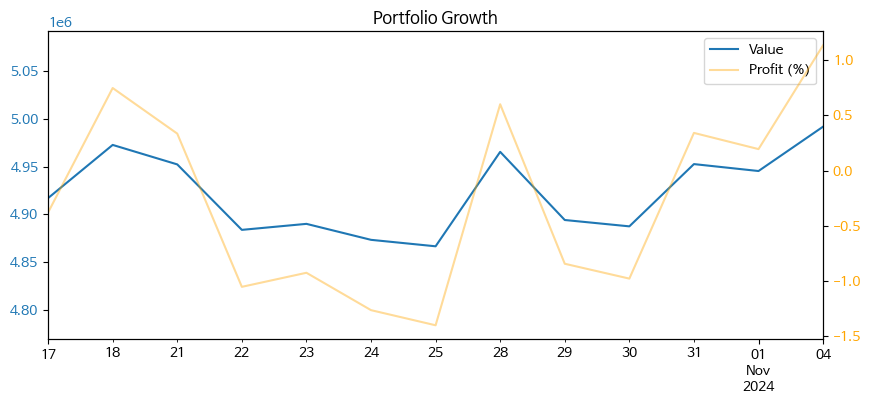

In [96]:
pf_per.valuate()

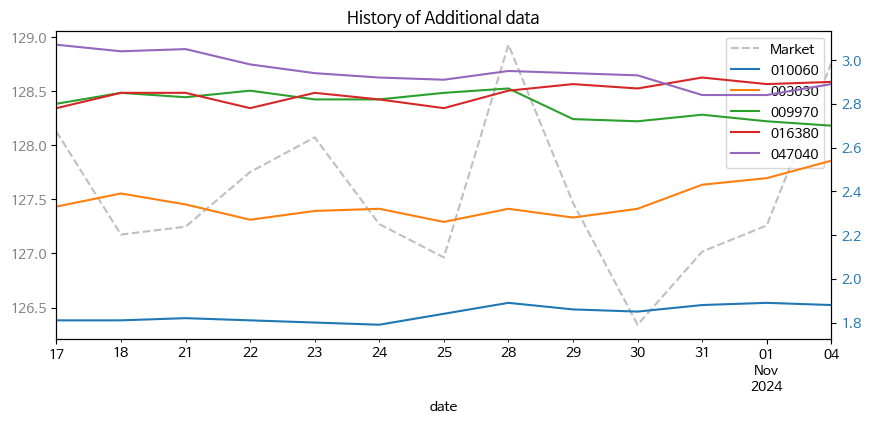

In [97]:
_ = pf_per.check_additional(plot=True, figsize=(10,4))

In [98]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [99]:
kwargs_trs = dict(
    n_assets = 20, #5,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-2)

Liquidation set to None
20 assets selected by Financial Ratio from 2024-09-04 to 2024-11-04
Weights of assets determined by Equal weights.
Mean absolute error of weights: 10 %
Portfolio value 4,502,360, Profit 1.3% on 2024-11-04
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                   
2024-10-17 010060   OCI홀딩스   66700           14   14    0.2  0.1892
           003030   세아제강지주  164450            6    6    0.2  0.1999
           009970  영원무역홀딩스   89000           11   11    0.2  0.1983
           016380     KG스틸    6600          154  154    0.2  0.2059
           047040     대우건설    3820          267  267    0.2  0.2066
2024-11-04 010060   OCI홀딩스   68800          -11    3  0.050  0.0458
           003030   세아제강지주  178200           -5    1  0.050  0.0396
           009970  영원무역홀딩스   86600           -9    2  0.050  0.0385
           016380     KG스틸    6790         -118   36  0.050  0.0543
           047040     대우건설    3600         -198   69  0.050  0.0552
           088350     한화생명    2920           85   85  0.050  0.0551
           078930       GS   41600            5    5  0.050  0.0462
           111770     영원무역   42150            5    5  0.050  0.0468
           139130  DGB금융지주    8180           30   30  0.050  0.0545
           005830   DB손해보험  112500            2    2  0.050  0.0500
           001450     현대해상   30750            8    8  0.050  0.0546
           009900     명신산업   13600           18   18  0.050  0.0544
           241560     두산밥캣   38250            6    6  0.050  0.0510
           000270       기아   97400            2    2  0.050  0.0433
           024110     기업은행   14360           17   17  0.050  0.0542
           005850      에스엘   32800            7    7  0.050  0.0510
           316140   우리금융지주   15810           15   15  0.050  0.0527
           138930  BNK금융지주    9400           26   26  0.050  0.0543
           017800   현대엘리베이   45500            5    5  0.050  0.0505
           005380      현대차  216500            1    1  0.050  0.0481

In [19]:
#pf_per.update_record()

Transaction record to 2024-10-17 loaded
Actual weights updated
Transaction file pf_k200_per_241017.csv updated
self.record updated


name   price  transaction  net  weight weight*
date       asset                                                    
2024-10-17 010060   OCI홀딩스   66700           14   14     0.2  0.1892
           003030   세아제강지주  164450            6    6     0.2  0.1999
           009970  영원무역홀딩스   89000           11   11     0.2  0.1983
           016380     KG스틸    6600          154  154     0.2  0.2059
           047040     대우건설    3820          267  267     0.2  0.2066

## ETF

In [134]:
kwargs = dict(
    name='ETF6',
    file=ETF[-1],
    method_weigh='Equally', lookback='1y',
    path=path_tran,
    days_in_year=245,
    asset_names=assetnames_etf,
    align_axis=None
)

pf_etf = StaticPortfolio(df_etf, **kwargs)

6 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-18 loaded


Portfolio value 9,772,270, Profit -0.5% on 2024-11-04


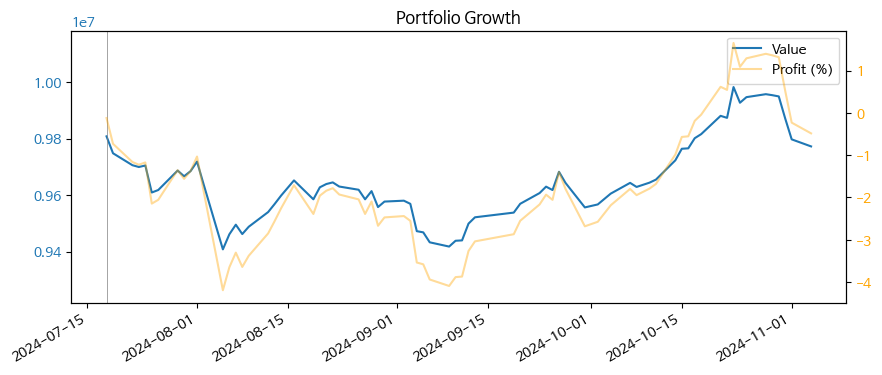

In [135]:
pf_etf.valuate()

In [136]:
pf_etf.performance(metrics=METRICS)

,ETF6
start,2024-07-18
end,2024-11-04
total_return,-0.003627
cagr,-0.012102
calmar,-0.297106
max_drawdown,-0.040734
avg_drawdown,-0.020823
avg_drawdown_days,34.333333
daily_vol,0.084206
daily_sharpe,-0.113624


In [137]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [139]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_etf.transaction_pipeline(**kwargs)
pf_etf.view_record(-2)

Liquidation set to None
6 assets from 2023-10-30 to 2024-10-28 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 1 %
Portfolio value 9,580,550, Profit -0.3% on 2024-11-04
Set save=True to save transaction record


name   price  transaction  net weight  \
date       asset                                                           
2024-07-18 069500             KODEX 200   39085           42   42  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14  0.167   
           148070          KOSEF 국고채10년  114910           14   14  0.167   
           379800      KODEX 미국S&P500TR   17625           94   94  0.167   
           411060            ACE KRX금현물   15715          106  106  0.167   
           284430        KODEX 200미국채혼합   13440          124  124  0.167   
2024-10-28 069500             KODEX 200   34785            5   47  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114040            0   14  0.167   
           148070          KOSEF 국고채10년  115905            0   14  0.167   
           379800      KODEX 미국S&P500TR   18435           -6   88  0.167   
           411060            ACE KRX금현물   18365          -17   89  0.167   
           284430        KODEX 200미국채혼합   12880            3  127  0.167   

                  weight*  
date       asset           
2024-07-18 069500   0.167  
           273130   0.161  
           148070   0.164  
           379800   0.169  
           411060    0.17  
           284430    0.17  
2024-10-28 069500  0.1677  
           273130  0.1638  
           148070  0.1665  
           379800  0.1664  
           411060  0.1677  
           284430  0.1678

## LIQ

In [105]:
kwargs = dict(
    name='Liquidating',
    file=LIQ[-1],
    method_weigh='Equally',
    path=path_tran,
    days_in_year=244,
    asset_names=assetnames_liq,
)

pf_liq = StaticPortfolio(df_liq, **kwargs)

period reset: 2023-06-16 ~ 2024-11-04
24 assets from 2023-06-16 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-01-03 loaded


Portfolio value 3,307,790, Profit -50.2% on 2024-11-04


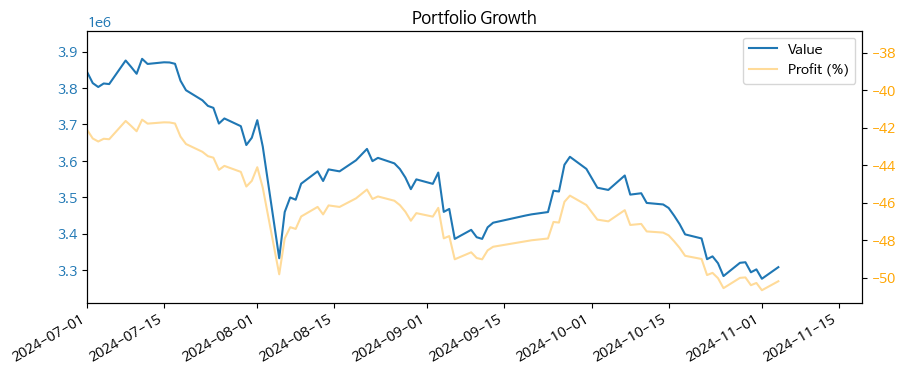

In [106]:
#date=None
date='2024-07-01'
pf_liq.valuate(start_date=date)

In [107]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## IRP

In [108]:
selected = ['K55301BU6139', 'K55206C95800']

In [109]:
kwargs = dict(
    name='TDF2',
    file=IRP[-1],
    lookback='1y',
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_irp,
)

pf_irp = StaticPortfolio(df_irp[selected], **kwargs)
pf_irp.record

period reset: 2018-07-26 ~ 2024-08-26
2 assets from 2018-07-26 to 2024-08-26 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-06-19 loaded


name  price  \
date       asset                                                            
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   

                         transaction   net  weight  weight*  
date       asset                                             
2024-06-19 K55301BU6139         3132  3132     0.5      0.5  
           K55206C95800         3657  3657     0.5      0.5

Portfolio value 9,963,967, Profit -0.3% on 2024-08-26


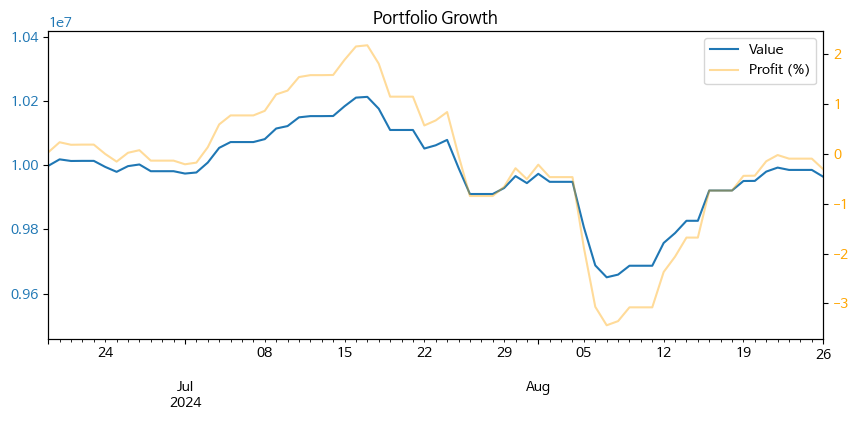

In [110]:
pf_irp.valuate()

In [111]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [112]:
kwargs = dict(
    method_weigh = 'Equally', 
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_irp.transaction_pipeline(**kwargs)
pf_irp.view_record()

Liquidation set to None
2 assets from 2023-08-26 to 2024-08-26 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 0 %
Portfolio value 9,962,573, Profit -0.3% on 2024-08-26
Set save=True to save transaction record


name  price  \
date       asset                                                            
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   
2024-08-26 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1576   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1374   

                         transaction   net weight weight*  
date       asset                                           
2024-06-19 K55301BU6139         3132  3132    0.5     0.5  
           K55206C95800         3657  3657    0.5     0.5  
2024-08-26 K55301BU6139           27  3159  0.500  0.5000  
           K55206C95800          -32  3625  0.500  0.5000

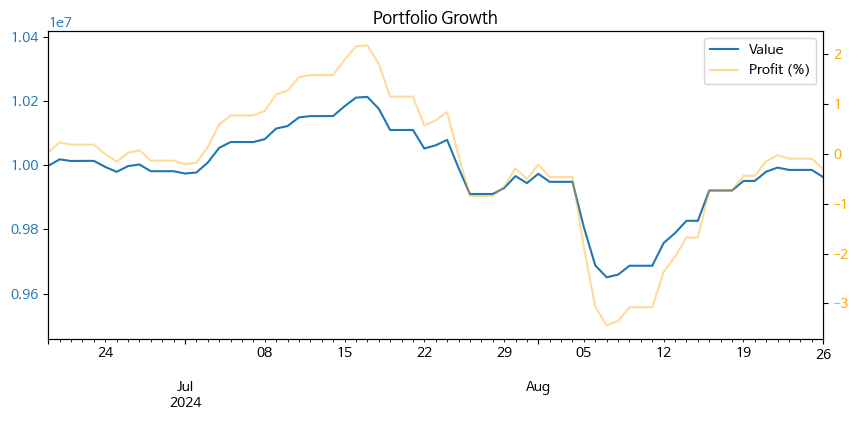

In [113]:
pf_irp.plot()

In [114]:
pf_irp.performance(metrics=METRICS)

,TDF2
start,2024-06-19
end,2024-08-26
total_return,-0.003532
cagr,-0.018825
calmar,-0.342151
max_drawdown,-0.055021
avg_drawdown,-0.029718
avg_drawdown_days,26.0
daily_vol,0.059014
daily_sharpe,-0.193009


## HANA

In [115]:
kwargs = dict(
    name='HANA4',
    file=HANA[-1],
    method_weigh='InvVol', lookback='1y', 
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_hana,
)

pf_hana = StaticPortfolio(df_hana, **kwargs)

period reset: 2019-10-31 ~ 2024-07-31
4 assets from 2019-10-31 to 2024-07-31 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-31 loaded


In [116]:
pf_hana.valuate()

Portfolio value 9,997,329, Profit 0.1% on 2024-07-31
ERROR: need more data to plot


In [117]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [118]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 assets from 2023-07-31 to 2024-07-31 prepared for weight analysis
ERROR: check the date as no new transaction
Portfolio value 9,997,329, Profit 0.1% on 2024-07-31


name  price  \
date       asset                                                        
2024-07-31 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1151   

                         transaction   net  weight  weight*  
date       asset                                             
2024-07-31 KR5101888398         4699  4699   0.502    0.502  
           KR5236AS4826         1920  1920   0.242    0.242  
           KR5370AP9956         1448  1448   0.186    0.186  
           K55306CV9946          602   602   0.069    0.069

In [119]:
pf_hana.plot()

ERROR: need more data to plot


In [120]:
pf_hana.performance(metrics=METRICS)

ERROR: Need more data to measure


## Summary

In [142]:
pfs = dict(
    MOM = MOM,
    ETF = ETF,
    LIQ = LIQ,
    PER = PER,
    #IRP = IRP,
    #HANA = HANA
)
pm = PortfolioManager(pfs, path_price=path_data, path_transaction=path_tran)

201 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
201 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-08 loaded
911 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
911 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-18 loaded
24 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
24 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-01-03 loaded
201 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
201 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-17 loaded


In [143]:
#pm.valuate('2024-09-23')
pm.valuate()

Profit/Loss
MOM  : -4.5%
ETF  : -0.5%
LIQ  : -50.2%
PER  : 1.1%
Total: -10.9% (-4,039,189)


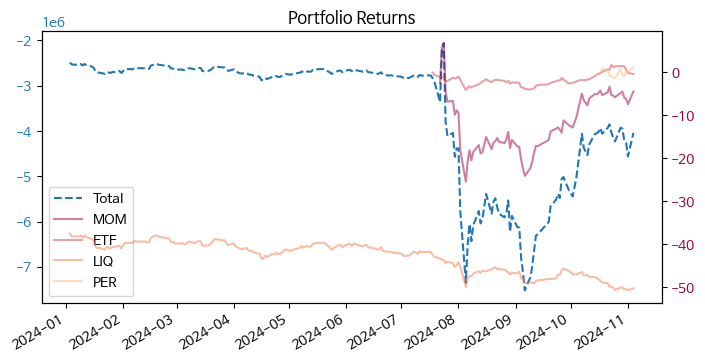

In [144]:
pm.plot_profit(percent=True)

# Testing

In [140]:
import pandas as pd
from pf_utils import set_matplotlib_twins
from matplotlib import pyplot as plt
import numpy as np


class PortfolioManager():
    def __init__(self, portfolios, path_price='.', path_transaction='.'):
        """
        portfolios: dict of list of universe, price file and trasaction file.
                    ex) portfolios['Momentum'] = ['kospi200', 'kospi200_prices.csv', 'pf_k200_momentum.csv']
        """
        pf_dict = dict()
        for name, data in portfolios.items():
            try:
                universe, file_price, file_transaction = data
                df = self._get_price(universe, file_price, path_price)
                pf_dict[name] = self._import_portfolio(df, file_transaction, path_transaction)
            except Exception as e:
                print('ERROR')
        self.portfolios = pf_dict

    def _get_price(self, universe, file, path):
        dm = DataManager(universe=universe, file=file, path=path)
        dm.upload()
        return dm.df_prices        

    def _import_portfolio(self, df, file, path):
        return StaticPortfolio(df, file=file, path=path, align_axis=None)

    def plot_profit(self, percent=True, figsize=(8,4), legend=True,
                    colors = plt.cm.Spectral(np.linspace(0,1,10))):
        # total profit/loss
        dfs = [self.portfolios[x].get_profit_history(percent=False) 
               for x in self.portfolios.keys()]
        ax1 = (pd.concat(dfs, axis=1).sum(axis=1).rename('Total')
               .plot(ls='--', title='Portfolio Returns', figsize=figsize))
        # individual return
        dfs = [self.portfolios[x].get_profit_history(percent=percent).rename(x) 
               for x in self.portfolios.keys()]
        ax2 = ax1.twinx()
        ax2.set_prop_cycle(color=colors)
        _ = pd.concat(dfs, axis=1).plot(ax=ax2, alpha=0.5)
        _ = set_matplotlib_twins(ax1, ax2, legend=legend)

    def valuate(self, date=None):
        print('Profit/Loss')
        val, cflow = 0, 0
        for name, pf in self.portfolios.items():
            try:
                v, c = pf.valuate(date=date, plot=False, print_msg=False)
            except Exception as e:
                print(f'ERROR:({name}) {e}')
            print(f'{name:<5}: {v/c-1:.1%}')
            val += v
            cflow += c
        print(f'Total: {val/cflow-1:.1%} ({val-cflow:,})')
        
        

In [113]:
pfs = dict(
    MOM = ['kospi200', 'kospi200_prices.csv', 'pf_k200_momentum.csv'],
    ETF = ['etf', 'etfs_all.csv', 'pf_etf_static.csv'],
    LIQ = ['krx', 'krx_liq_prices.csv', 'pf_liq_static.csv'],
    PER = ['kospi200', 'kospi200_prices.csv', 'pf_k200_per.csv']
    
)
pm = PortfolioManager(pfs, path_price=path_data, path_transaction=path_tran)

201 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
201 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-08 loaded
911 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
911 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-18 loaded
24 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
24 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-01-03 loaded
201 assets from 2021-01-04 to 2024-11-04 uploaded.
df_prices updated
201 assets from 2021-01-04 to 2024-11-04 uploaded.
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-10-17 loaded


In [114]:
#pm.valuate('2024-09-23')
pm.valuate()

Profit/Loss
MOM  : -4.5%
ETF  : -0.5%
LIQ  : -50.2%
PER  : 1.1%
Total: -10.9% (-4,039,189)


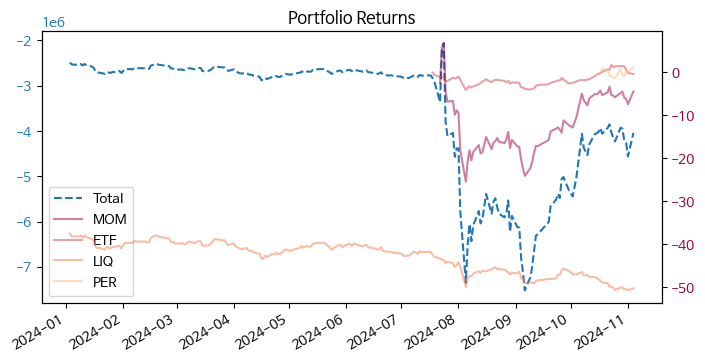

In [115]:
pm.plot_profit(percent=True)

In [33]:
val, cfl = pm.portfolios['MOM'].valuate(plot=False)

Portfolio value 14,621,500, Profit -7.5% on 2024-11-01


(14621500, 15801751)

In [8]:
from os.path import isfile, join, splitext
file = 'test.csv'
name, ext = splitext(file)
name, ext


def set_ext(file, default='csv'):
    name, ext = splitext(file)
    if len(ext) == 0:
        file = f'{file}.{default}'
    return file

set_ext('test.test', 'pkl')

'test.test'

In [29]:
from os.path import isfile, join, splitext
from os import listdir
import re

file = 'etfs_all.csv'
path = 'data'
name, ext = splitext(file)
name = name.replace('*', r'(.*?)')

#rex = f'{name}.*{ext}'
#rex = f'{name}.*{ext[1:]}'
rex = 'etfs_all.*.csv'

flist = [f for f in listdir(path) if isfile(join(path, f)) and re.search(rex, f)]
#rex, sorted(flist)[-1]
sorted(flist)[-1]

'etfs_all_241104.csv'

In [39]:
file_type = 'test'
name = name if file_type is None else f'{file_type} {name}'
print(f'WARNING: no {name}*{ext} exists')

In [43]:
default='temp.csv'
#default='tempcsv'
default.split('.')[-1]
name, ext = splitext(default)
name, ext

('temp', '.csv')

In [65]:
def set_filename(file, ext=None, default=None):
    """
    return default for file name if file is None
    set extension if no extension in file
    defaule: ex) 'temp.csv', 'temp', None
    ext: ex) '.csv', 'csv', None
    """
    # set dault file name and extension
    if default is not None:
        name, _ext = splitext(default)
        ext = _ext if ext is None else ext
        ext = ext.replace('.', '')
    # return default if file is None
    if file is None:
        if default is not None:
            default = name if ext is None else f'{name}.{ext}'
        return default
    # set ext if no ext in file    
    name, _ext = splitext(file)
    if len(_ext) == 0:
        file = name if ext is None else f'{name}.{ext}'
    return file


file = 'test'
#file = 'test.csv'
#file = None
#set_filename(file, 'csv', 'train.pkl')
set_filename(file, None, 'train.pkl')

'test.pkl'

# Testing

In [124]:
ae = AssetEvaluator(df, 181)
ae.get_stats(sort_by='cagr', align_period=False)

,PER,TDF2,ETF6,KOSPI Momentum,Liquidating,HANA4
start,2024-10-17,2024-06-19,2024-07-18,2024-07-22,2024-01-03,2024-07-31
end,2024-11-01,2024-08-26,2024-11-01,2024-11-01,2024-11-01,2024-07-31
total_return,4.040109,-0.003487,-0.009688,-0.06074,-0.21101,NaN
cagr,127178185535039952.0,-0.018586,-0.032987,-0.200995,-0.248506,NaN
calmar,5959518001672761344.0,-0.337805,-0.80982,-0.667256,-1.1777,NaN
max_drawdown,-0.02134,-0.055021,-0.040734,-0.301226,-0.21101,NaN
avg_drawdown,-0.02134,-0.029718,-0.022808,-0.163233,-0.21101,NaN
avg_drawdown_days,11.0,26.0,33.333333,32.333333,302.0,NaN
daily_vol,19.161051,0.058965,0.088936,0.846624,0.163631,NaN
daily_sharpe,4.796394,-0.190367,-0.355652,0.13012,-1.722904,NaN


In [114]:
pf_hana.get_historical()

2024-07-31    9997329
Freq: D, Name: HANA4, dtype: int64

In [116]:
pf_k200, pf_per, pf_etf, pf_liq, pf_irp, pf_hana

(<pf_utils.DynamicPortfolio at 0x781801520f50>,
 <pf_utils.StaticPortfolio at 0x7818013a63f0>)

In [119]:
def util_get_historicals(*pf_list):
    df_hs = None
    for pf in pf_list:
        df = pf.get_historical()
        if df_hs is None:
            df_hs = df.to_frame()
        else:
            df_hs = df_hs.join(df, how='outer')
    return df_hs



def util_get_profits(*pf_list):
    df_hs = None
    for pf in pf_list:
        df = pf.get_historical()
        if df_hs is None:
            df_hs = df.to_frame()
        else:
            df_hs = df_hs.join(df, how='outer')
    return df_hs


df = util_get_historicals(pf_k200, pf_per, pf_etf, pf_liq, pf_irp, pf_hana)

Assets 489790 added to universe


Assets 489790 added to universe


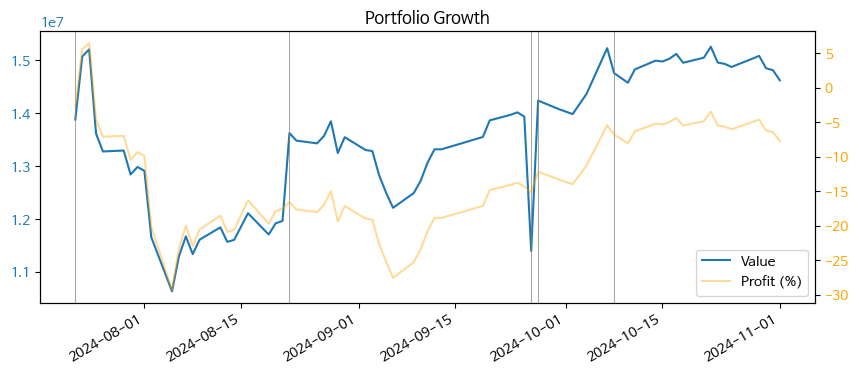

In [13]:
pf_k200.plot(pnl_log=True)

In [17]:
pf_k200

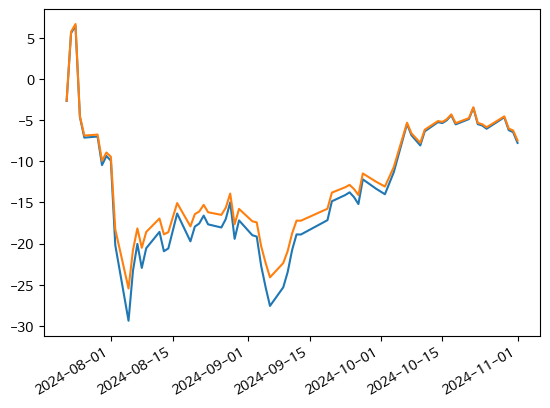

In [32]:
self = pf_k200
df_rec = self._check_result()
sr_historical = self._calc_historical(df_rec, self.name)
sr_cf = self._calc_cashflow_history(df_rec) # cashflow
sr_prf1 = self._calc_profit(sr_historical, sr_cf, percent=True, log=True) # profit
sr_prf2 = self._calc_profit(sr_historical, sr_cf, percent=True, log=False) # profit
ax = sr_prf1.plot()
_ = sr_prf2.plot(ax=ax)

<Axes: >

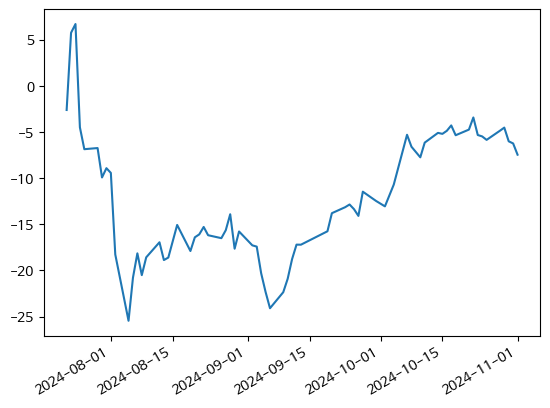

In [31]:
sr_prf = self._calc_profit(sr_historical, sr_cf, percent=True, log=False) # profit
sr_prf.plot()

In [12]:
pf_k200.get_value_history()

Assets 489790 added to universe


2024-07-22    13880500
2024-07-23    15072500
2024-07-24    15207500
2024-07-25    13612500
2024-07-26    13275200
                ...   
2024-10-28    15031000
2024-10-29    15085000
2024-10-30    14850500
2024-10-31    14814000
2024-11-01    14621500
Name: KOSPI Momentum, Length: 68, dtype: int64

In [13]:
pf_k200.get_cash_history()

date
2024-07-22   -14255000
2024-08-22   -16084500
2024-09-26   -13259500
2024-09-27   -16084501
2024-10-08   -15801751
dtype: int64

In [15]:
pf_k200.get_profit_history(log=False, percent=False)

Assets 489790 added to universe


2024-07-22    -374500.0
2024-07-23     817500.0
2024-07-24     952500.0
2024-07-25    -642500.0
2024-07-26    -979800.0
                ...    
2024-10-28    -770751.0
2024-10-29    -716751.0
2024-10-30    -951251.0
2024-10-31    -987751.0
2024-11-01   -1180251.0
Length: 68, dtype: float64

Assets 489790 added to universe


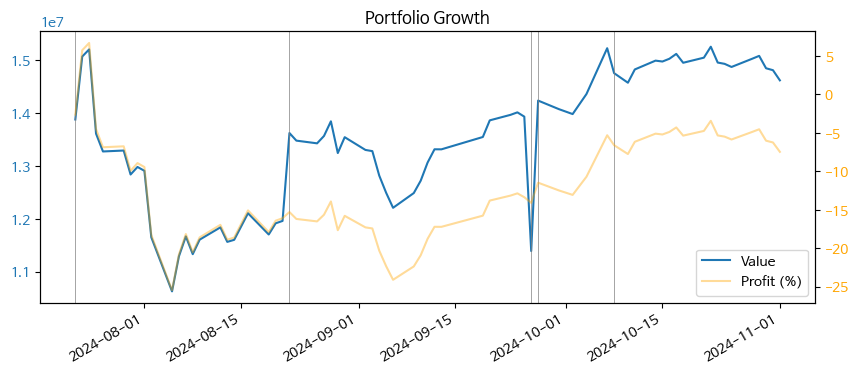

In [16]:
pf_k200.plot()

In [16]:
from pf_utils import performance_stats

df = pf_k200.get_value_history()
performance_stats(df).loc['cagr']

Assets 489790 added to universe


KOSPI Momentum    0.204705
Name: cagr, dtype: object

In [24]:
df = pf_k200.get_profit_history(percent=True)
df = (df+100)/100*1e9
performance_stats(df).loc['cagr']

Assets 489790 added to universe


0   -0.166934
Name: cagr, dtype: object

In [22]:
df

2024-07-22    9.737285e+06
2024-07-23    1.057348e+07
2024-07-24    1.066819e+07
2024-07-25    9.549281e+06
2024-07-26    9.312662e+06
                  ...     
2024-10-28    9.512237e+06
2024-10-29    9.546410e+06
2024-10-30    9.398009e+06
2024-10-31    9.374910e+06
2024-11-01    9.253088e+06
Length: 68, dtype: float64

In [26]:
df = pf_k200.get_value_history()

Assets 489790 added to universe


In [28]:
ae = AssetEvaluator(df, days_in_year=236)

In [31]:
ae.get_stats()

,KOSPI Momentum
start,2024-07-22
end,2024-11-01
total_return,0.053384
cagr,0.204705
calmar,0.679572
max_drawdown,-0.301226
avg_drawdown,-0.128628
avg_drawdown_days,32.333333
daily_vol,0.827651
daily_sharpe,0.634747


In [33]:
ae.bayesian_sample(freq='monthly')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mean, vol]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [34]:
var_names = ['_mean', '_vol']
ae.bayesian_summary(var_names)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
monthly_mean[KOSPI Momentum],12.156,1.888,8.492,15.555,0.040,0.028,2214.0,2355.0,1.0
monthly_vol[KOSPI Momentum],3.433,0.592,2.304,4.476,0.014,0.010,1833.0,2448.0,1.0
